# Trafo
Fred Järv

Töö eesmärk oli uurida ühefaasilise transformaatori põhikäitumist nii tühijooksul kui koormusel ning hinnata reaalse transformaatori erinevusi ideaalsest trafost. Transformaatoreid kasutatakse vahelduvpinge taseme muutmiseks (pinget tõstetakse või alandatakse).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

w1 = 600  # primaarmähise keerdude arv
def arvuta_vahelduvvoolu_suurused(U, I, P):
    S = U * I
    cosf = np.where(S != 0, P / S, np.nan)
    cosf = np.clip(cosf, -1, 1)
    phi = np.degrees(np.arccos(cosf))
    return S, cosf, phi

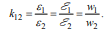 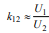

k_w on siis ülekandetegur mähiste keerdude kaudu ja k_u pingete kaudu

In [8]:
#1)Ülekandetegur tühijooksul 

tabel1 = pd.DataFrame({
    "w2":    [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72],
    "U1_V":  [249.1, 248.4, 248.4, 248.3, 248.4, 248.6, 248.6, 248.8, 248.7, 248.7, 248.7, 248.7],
    "I10_A": [0.188]*12,  
    "P10_W": [23.5]*12,
    "U20_V": [2.441, 4.9, 7.36, 9.79, 12.24, 14.67, 17.13, 19.55, 21.97, 24.38, 26.8, 29.2]})

# Ülekandetegurid
tabel1["k_u"] = tabel1["U1_V"] / tabel1["U20_V"]   # pingete suhe
tabel1["k_w"] = w1 / tabel1["w2"]                  # keerdude suhe

# S, cosφ, φ
tabel1["S_VA"], tabel1["cosφ"], tabel1["φ_kraad"] = arvuta_vahelduvvoolu_suurused(
    tabel1["U1_V"], tabel1["I10_A"], tabel1["P10_W"])

# Rauaskao hinnang tühijooksust
P_Fe_n = float(np.nanmean(tabel1["P10_W"]))

print("=== Tabel 1 (tühijooks) ===")
print(tabel1)
print(f"\nHinnang nimirauaskao kohta tühijooksust: P_Fe,n ≈ {P_Fe_n:.2f} W")


=== Tabel 1 (tühijooks) ===
    w2   U1_V  I10_A  P10_W   U20_V         k_u         k_w     S_VA  \
0    6  249.1  0.188   23.5   2.441  102.048341  100.000000  46.8308   
1   12  248.4  0.188   23.5   4.900   50.693878   50.000000  46.6992   
2   18  248.4  0.188   23.5   7.360   33.750000   33.333333  46.6992   
3   24  248.3  0.188   23.5   9.790   25.362615   25.000000  46.6804   
4   30  248.4  0.188   23.5  12.240   20.294118   20.000000  46.6992   
5   36  248.6  0.188   23.5  14.670   16.946149   16.666667  46.7368   
6   42  248.6  0.188   23.5  17.130   14.512551   14.285714  46.7368   
7   48  248.8  0.188   23.5  19.550   12.726343   12.500000  46.7744   
8   54  248.7  0.188   23.5  21.970   11.319982   11.111111  46.7556   
9   60  248.7  0.188   23.5  24.380   10.200984   10.000000  46.7556   
10  66  248.7  0.188   23.5  26.800    9.279851    9.090909  46.7556   
11  72  248.7  0.188   23.5  29.200    8.517123    8.333333  46.7556   

        cosφ    φ_kraad  
0   0.501

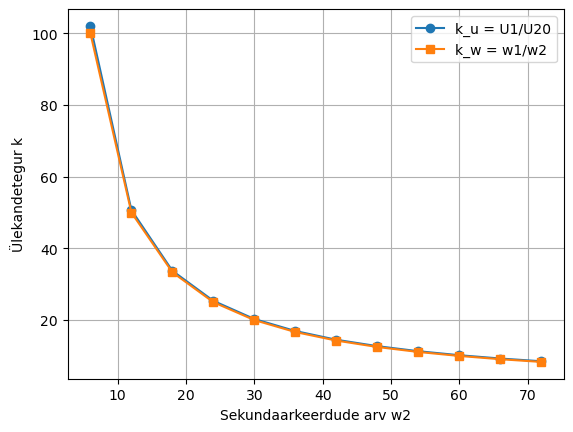

In [9]:
# Graafik k_u ja k_w sõltuvus w2-st
plt.figure()
plt.plot(tabel1["w2"], tabel1["k_u"], marker="o", label="k_u = U1/U20")
plt.plot(tabel1["w2"], tabel1["k_w"], marker="s", label="k_w = w1/w2")
plt.xlabel("Sekundaarkeerdude arv w2")
plt.ylabel("Ülekandetegur k")
plt.grid(True)
plt.legend()
plt.show()

Näeme, et tühijooksuvool ja võimsus on konstantsed sekundaarmähise keerdude suurenemisel, ehk peamiselt esinevad kaod raudsüdamikus
Ülekandeteguurid ku ja kw langevad ka päris hästi kokku

Võimsustegur on üpris väike, sest tühijooksuvool peaks olema induktiivne
Nimikadu rauas on P = 23,5 W

In [10]:
# 2) Südamiku mõju ja lühisekatse 

tabel2 = pd.DataFrame({
    "katse":  ["Südamikuga", "Südamik+paber", "teine veel", "lühisekatse"],
    "w1/w2":  [8.333333, 8.333333, 8.333333, 8.333333],
    "U1_V":   [191.0, 46.3, 72.0, 110.6],
    "U2_V":   [19.02, 2.025, 3.171, np.nan],        # lühisekatsel U2 ei ole vajalik / puudub
    "k_u":    [10.042061, 22.864198, 22.705771, np.nan],
    "I1_A":   [1.155, 1.208, 1.868, 1.925],
    "P1_W":   [17.2, 7.0, 17.0, 43.0]})

tabel2["k_u"] = np.where(tabel2["k_u"].notna(), tabel2["k_u"], tabel2["U1_V"] / tabel2["U2_V"])
tabel2["S_VA"], tabel2["cosφ"], tabel2["φ_kraad"] = arvuta_vahelduvvoolu_suurused(
    tabel2["U1_V"], tabel2["I1_A"], tabel2["P1_W"])

print("\n=== Südamiku mõju + lühisekatse ===")
print(tabel2)

P_Cu_n = float(tabel2.loc[tabel2["katse"] == "lühisekatse", "P1_W"].values[0])
print(f"\nHinnang nimivaseskaole lühisekatsest: P_Cu,n ≈ {P_Cu_n:.2f} W")


=== Südamiku mõju + lühisekatse ===
           katse     w1/w2   U1_V    U2_V        k_u   I1_A  P1_W      S_VA  \
0     Südamikuga  8.333333  191.0  19.020  10.042061  1.155  17.2  220.6050   
1  Südamik+paber  8.333333   46.3   2.025  22.864198  1.208   7.0   55.9304   
2     teine veel  8.333333   72.0   3.171  22.705771  1.868  17.0  134.4960   
3    lühisekatse  8.333333  110.6     NaN        NaN  1.925  43.0  212.9050   

       cosφ    φ_kraad  
0  0.077967  85.528258  
1  0.125156  82.810261  
2  0.126398  82.738515  
3  0.201968  78.347933  

Hinnang nimivaseskaole lühisekatsest: P_Cu,n ≈ 43.00 W


In [11]:
# 3) Trafo töökarakteristikud

tabel3 = pd.DataFrame({
    "I2_A": [0.22, 0.5, 1.0, 2.0, 3.0, 3.99, 5.0],
    "U1_V": [245.3, 245.2, 244.8, 244.7, 244.7, 244.1, 244.0],
    "I1_A": [0.199, 0.22, 0.264, 0.369, 0.484, 0.599, 0.718],
    "U2_V": [28.77, 28.69, 28.58, 28.35, 28.1, 27.81, 27.51],
    "P1_W": [32.0, 41.0, 56.0, 81.0, 105.0, 130.0, 162.5]})

tabel3["S_VA"], tabel3["cosφ1"], tabel3["φ1_kraad"] = arvuta_vahelduvvoolu_suurused(
    tabel3["U1_V"], tabel3["I1_A"], tabel3["P1_W"])

# Reostaat → koormus ligikaudu takistuslik: P2 ≈ U2 * I2
tabel3["P2_W"] = tabel3["U2_V"] * tabel3["I2_A"]
tabel3["η"] = tabel3["P2_W"] / tabel3["P1_W"]

# U20 hinnang: võtame väikseima koormuse juures mõõdetud U2
U20 = float(tabel3.loc[tabel3["I2_A"].idxmin(), "U2_V"])
tabel3["δ_%"] = (U20 - tabel3["U2_V"]) / U20 * 100

print("\n=== Trafo töökarakteristikud (Tabel 3) ===")
print(tabel3)
print(f"\nHinnang tühijooksupingele U20 (kasutatud väikseim I2): U20 ≈ {U20:.3f} V")


=== Trafo töökarakteristikud (Tabel 3) ===
   I2_A   U1_V   I1_A   U2_V   P1_W      S_VA     cosφ1   φ1_kraad      P2_W  \
0  0.22  245.3  0.199  28.77   32.0   48.8147  0.655540  49.039374    6.3294   
1  0.50  245.2  0.220  28.69   41.0   53.9440  0.760047  40.531618   14.3450   
2  1.00  244.8  0.264  28.58   56.0   64.6272  0.866508  29.944627   28.5800   
3  2.00  244.7  0.369  28.35   81.0   90.2943  0.897067  26.224877   56.7000   
4  3.00  244.7  0.484  28.10  105.0  118.4348  0.886564  27.555425   84.3000   
5  3.99  244.1  0.599  27.81  130.0  146.2159  0.889096  27.240106  110.9619   
6  5.00  244.0  0.718  27.51  162.5  175.1920  0.927554  21.943352  137.5500   

          η       δ_%  
0  0.197794  0.000000  
1  0.349878  0.278067  
2  0.510357  0.660410  
3  0.700000  1.459854  
4  0.802857  2.328815  
5  0.853553  3.336809  
6  0.846462  4.379562  

Hinnang tühijooksupingele U20 (kasutatud väikseim I2): U20 ≈ 28.770 V


Andmetest näeme, et mida suurema vahe me teeme südamiku ja ülejääk süsteemi vahele, seda rohkem halveneb trafo kvaliteet
Südamiku eemaldamisega vähenes ka sekundaarpinge
ülekandetegur k_u seevastu suurenes, kuna sekundaarpinge langes kiiremini, kui primaarpinge
Väkseks jäi ka võimsustegur, vool induktiivne

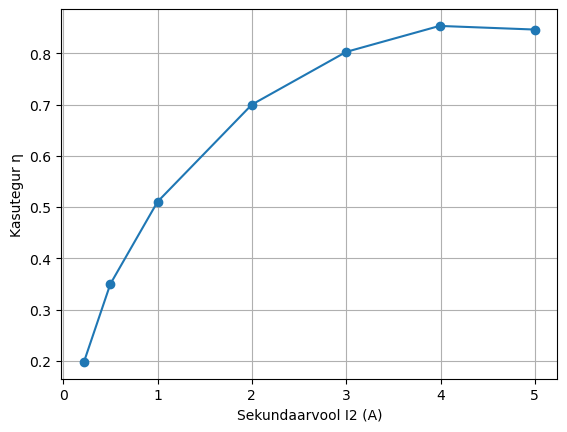

In [12]:
# Graafik η(I2)
plt.figure()
plt.plot(tabel3["I2_A"], tabel3["η"], marker="o")
plt.xlabel("Sekundaarvool I2 (A)")
plt.ylabel("Kasutegur η")
plt.grid(True)
plt.show()

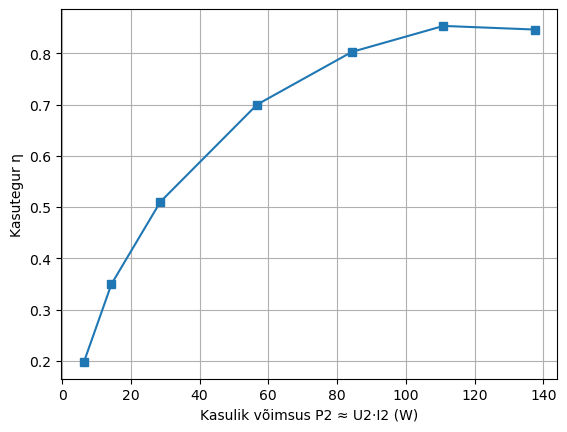

In [13]:
# Graafik η(P2)
plt.figure()
plt.plot(tabel3["P2_W"], tabel3["η"], marker="s")
plt.xlabel("Kasulik võimsus P2 ≈ U2·I2 (W)")
plt.ylabel("Kasutegur η")
plt.grid(True)
plt.show()

Graafikult on hästi näha, kuidas voolu suurenemisega väheneb üpris lineaarselt sekundaarpinge, sest sureneva vooluga suureneb ka pinge langus takistusel
Kasutegur tõuseb alguses kiiresti, kuid umbes 0,84 juures jääb konstantseks, 
Pinge muudust on näha, et sekundaarpinge vähenes sekundaarmähise voolu vähenemisega

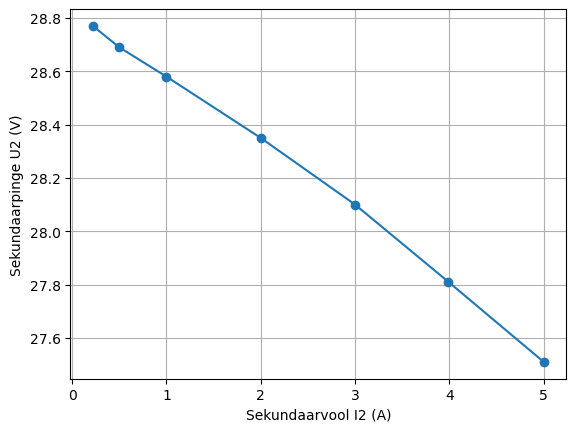

In [14]:
# Graafik U2(I2)
plt.figure()
plt.plot(tabel3["I2_A"], tabel3["U2_V"], marker="o")
plt.xlabel("Sekundaarvool I2 (A)")
plt.ylabel("Sekundaarpinge U2 (V)")
plt.grid(True)
plt.show()

In [15]:
# Maksimaalne pingeregulatsioon tabeli suurimal koormusel
imax = tabel3["I2_A"].idxmax()
print(f"\nMaksimaalsel koormusel I2 ≈ {tabel3.loc[imax,'I2_A']:.2f} A "
      f"on U2 ≈ {tabel3.loc[imax,'U2_V']:.2f} V ja δ ≈ {tabel3.loc[imax,'δ_%']:.2f} %.")


Maksimaalsel koormusel I2 ≈ 5.00 A on U2 ≈ 27.51 V ja δ ≈ 4.38 %.


Ülesanne 1
Kui primaarmähisele rakendada alalispinge 230 V, siis püsirežiimis induktiivtakistust ei ole, mähis käitub sisuliselt kui takisti oma alalisvoolutakistusega R. Seega vool on ligikaudu I = U/R. P = I^2 * R, ehk R = P/(I^2). Kui P = 43 W ja I = 1,925 A, siis R = 43/(1,925^2) = 11,6 oomi. Sellisel juhul oleks alalispinge 230 V korral I = 230/11,6 = 19,8 A. 
Ülesanne 2
Kui südamik täielikult eemaldada ja rakendada 230 V (50 Hz), siis voolu piirab vahelduvvoolu korral mähise impedants Z. Südamikuta režiimis on U/I ligikaudu konstantne: näiteks 46,3 V / 1,208 A = 38,3 oomi ja 72 V / 1,868 A = 38,5 oomi. Seega Z = 38,4 oomi. Siis 230 V korral oleks vool I = 230/38,4 = 6 A.
Miks see vool on väiksem kui sama suure alalispinge korral?
Sest vahelduvvoolu korral tekib induktiivtakistus XL, mis kasvab sagedusega ja induktiivsusega (XL = 2*pi*f*L, ehk f ja L suurenedes suureneb XL). Kogutakistus siis  Z, ning vool on I = U/Z. Alalisvoolu püsirežiimis on induktiivne osa sisuliselt 0 ja jääb ainult R, mistõttu I = U/R on palju suurem.
Kui suure 50 Hz pingega voolaks maksimaalne lubatud vool 2.2 A?
Kui võtta sama südamikuta impedants Z = 38,4 oomi, siis Umax = Imax * Z = 2,2 * 38,4 = 84,5 V.
Miks tühijooksuvool I10 ja võimsus P10 praktiliselt ei sõltu sekundaarmähise keerdude arvust w2? Millele kulub primaarilt võetav võimsus?
Tühijooksul on sekundaarmähis lahti, seega sekundaaris voolu ei ole. Kui I2 = 0, siis sekundaar ei tarbi võimsust, ükskõik kui suur on w2. Primaaris peab siiski voolama tühijooksuvool I10, sest primaarile antud vahelduvpinge tekitab südamikus magnetvoo mille  tekitamiseks on vaja magnetiseerimisvoolu. See sõltub peamiselt südamiku magnetomadustest ja primaarpingest/sagedusest. Tühijooksul primaarilt võetav aktiivvõimsus P10 kulub peamiselt südamiku kadudeks hüstereesis ja pöörisvooludes.

Miks südamiku magnettakistuse kunstliku suurendamisega kasvab primaarmähise tühijooksuvool? Kas koos voolu kasvuga kasvab samal määral ka primaarmähise tarbitav võimsus? Milliste kadude arvele võib kasvu kirjutada?
Kui magnettakistus suureneb, siis sama magnetvoo tekitamiseks on vaja suuremat magnetomotoorjõudu , seega magnetiseerimisvool I0 kasvab. Tarbitav võimsus ei pea kasvama samas proportsioonis kui vool, sest suur osa magnetiseerimisvoolu kasvust on reaktiivne ja ei anna otseselt aktiivvõimsust
